## Preambule

In [1]:
import numpy as np
import pandas as pd
import yaml
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
from importlib import reload

## Run class

In [2]:
import Classes
reload(Classes)
from Classes import ecemf_reader, calculator

In [3]:
readclass = ecemf_reader()
readclass.read_csv_files()
readclass.add_average_gdps()
readclass.convert_to_xr()

x:\user\dekkerm\Projects\IAMfingerprints\Calculating\Classes.py:53: RuntimeWarning: Mean of empty slice.
  ag = (np.array(self.pd_mod[(self.pd_mod.Variable == 'GDP|PPP') & (self.pd_mod.Model == m) & (self.pd_mod.Region == 'Europe')])[:, 5:]).mean(axis=0)
x:\user\dekkerm\Projects\IAMfingerprints\Calculating\Classes.py:61: RuntimeWarning: Mean of empty slice.
  ag = (np.array(self.pd_mod[(self.pd_mod.Variable == 'GDP|PPP') & (self.pd_mod.Model == m) & (self.pd_mod.Region == 'World')])[:, 5:]).mean(axis=0)
x:\user\dekkerm\Projects\IAMfingerprints\Calculating\Classes.py:70: RuntimeWarning: Mean of empty slice
  av_gdp[t_i, 0] = np.nanmean(np.array(all_gdpse)[:, t_i].astype(float))
x:\user\dekkerm\Projects\IAMfingerprints\Calculating\Classes.py:72: RuntimeWarning: Mean of empty slice
  av_gdp[t_i, 1] = np.nanmean(np.array(all_gdpsw)[:, t_i].astype(float))


In [4]:
calcclass = calculator(readclass.data_xr)
calcclass.calculate_responsiveness_indicators()
calcclass.calculate_mitigationstrategy_indicators()
calcclass.calculate_energysupply_indicators()
calcclass.calculate_energydemand_indicators()
calcclass.calculate_costandeffort_indicators()
calcclass.convert_to_indicator_xr()
calcclass.export_indicators_to_netcdf()

x:\user\dekkerm\Projects\IAMfingerprints\Calculating\Classes.py:183: RuntimeWarning: All-NaN slice encountered
  potentials[s_i, m_i] = np.nanmax(speed[s_i, m_i], axis=1)
x:\user\dekkerm\Projects\IAMfingerprints\Calculating\Classes.py:203: RuntimeWarning: Mean of empty slice
  sens_prim = np.nanmean(var_prim, axis=1)
x:\user\dekkerm\Projects\IAMfingerprints\Calculating\Classes.py:222: RuntimeWarning: Mean of empty slice
  sens_dem = np.nanmean(var_dem, axis=1)


In [5]:
calcclass.data_xr.sel(Model='PRIMES 2022', Time=2050, Scenario='DIAG-C400-lin', Variable='Emissions|CO2')

<xarray.Dataset>
Dimensions:   (Region: 2)
Coordinates:
    Time      int32 2050
    Model     <U11 'PRIMES 2022'
    Scenario  <U13 'DIAG-C400-lin'
    Variable  <U13 'Emissions|CO2'
  * Region    (Region) object 'Europe' 'World'
Data variables:
    Value     (Region) float64 74.0 nan

#### Compute meta indicators

In [6]:
mods = ['WITCH 5.0', 'PRIMES 2022', 'MESSAGEix-GLOBIOM 1.2', 'PROMETHEUS 1.2', 'IMAGE 3.2', 'REMIND 2.1', 'Euro-Calliope 2.0', 'TIAM-ECN 1.2']

In [7]:
calcclass.ind_xr.Indicator

<xarray.DataArray 'Indicator' (Indicator: 25)>
array(['C1_cost', 'C2_ti', 'C3_dem', 'ED1_etrans', 'ED2_eindus', 'ED3_ebuild',
       'ED4_emise', 'ED5_hydrogen', 'ES1_coal', 'ES2_oil', 'ES3_gas',
       'ES4_solar', 'ES5_wind', 'ES6_biomass', 'ES7_nuclear', 'M1_cir',
       'M2_eir', 'M3_cc', 'M4_nonco2', 'S1_rai', 'S1s_rai', 'S2_time',
       'S3_speedmax', 'S4_sensprim', 'S5_sensdem'], dtype=object)
Coordinates:
  * Indicator  (Indicator) object 'C1_cost' 'C2_ti' ... 'S5_sensdem'

Responsiveness

In [8]:
inds = ['C3_dem']
for model in mods:
    vals = []
    for ind in inds:
        std_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).std()
        med_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).median()
        med_mod = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=model, Scenario=calcclass.settings['scenarios_c400']).median()
        vals.append(float(((med_mod-med_ens) / std_ens).Value))

    print(model)
    print(np.round(np.mean(vals), 1))
    print('')

WITCH 5.0
1.1

PRIMES 2022
0.0

MESSAGEix-GLOBIOM 1.2
-1.4

PROMETHEUS 1.2
-0.8

IMAGE 3.2
0.7

REMIND 2.1
0.4

Euro-Calliope 2.0
nan

TIAM-ECN 1.2
-1.8



In [9]:
inds = ['S4_sensprim', 'S5_sensdem']

for model in mods:
    vals = []
    for ind in inds:
        std_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).std()
        med_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).median()
        med_mod = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=model, Scenario=calcclass.settings['scenarios_c400']).median()
        vals.append(float(((med_mod-med_ens) / std_ens).Value))

    print(model)
    print(np.round(np.mean(vals), 1))
    print('')

WITCH 5.0
0.4

PRIMES 2022
-0.3

MESSAGEix-GLOBIOM 1.2
0.2

PROMETHEUS 1.2
0.0

IMAGE 3.2
0.6

REMIND 2.1
1.3

Euro-Calliope 2.0
1.2

TIAM-ECN 1.2
-0.4



Energy supply

In [10]:
indlists = [['ES1_coal', 'ES2_oil', 'ES3_gas'],
            ['ES5_wind', 'ES4_solar'],
            ['ES6_biomass', 'ES7_nuclear']]
indnames = ['fossil', 'renewables', 'other']

for model in mods:
    print(model)
    for inds_i, inds in enumerate(indlists):
        vals = []
        for ind in inds:
            std_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).std()
            med_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).median()
            med_mod = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=model, Scenario=calcclass.settings['scenarios_c400']).median()
            vals.append(float(((med_mod-med_ens) / std_ens).Value))
        print(indnames[inds_i][0], np.round(np.mean(vals), 2))
    print('')

WITCH 5.0
f 0.89
r -0.05
o 0.22

PRIMES 2022
f 0.06
r 0.06


o -0.33

MESSAGEix-GLOBIOM 1.2
f 0.54
r -0.05
o 0.44

PROMETHEUS 1.2
f 0.53
r -0.88
o 1.88

IMAGE 3.2
f 1.37
r -0.92
o 0.19

REMIND 2.1
f -0.64
r 0.69
o 0.11

Euro-Calliope 2.0
f -0.91
r 1.23
o -0.63

TIAM-ECN 1.2
f 1.22
r -0.47
o 0.29



Mitigation strategies

In [11]:
inds = ['M1_cir', 'M2_eir', 'M3_cc', 'M4_nonco2']

for model in mods:
    print(model)
    for ind in inds:
        std_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Scenario=calcclass.settings['scenarios_c400']).std()
        med_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Scenario=calcclass.settings['scenarios_c400']).median()
        med_mod = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=model, Scenario=calcclass.settings['scenarios_c400']).median()
        #print(float(np.abs((std_ens / med_ens).Value)))
        print(ind, np.round(float(((med_mod-med_ens) / std_ens).Value), 1))
    print('')

WITCH 5.0
M1_cir -0.5
M2_eir 2.2
M3_cc 1.3
M4_nonco2 -0.1

PRIMES 2022
M1_cir 0.1
M2_eir 0.5
M3_cc -0.1
M4_nonco2 0.8

MESSAGEix-GLOBIOM 1.2
M1_cir -0.7
M2_eir -0.6
M3_cc 1.3
M4_nonco2 0.0

PROMETHEUS 1.2


M1_cir -0.4
M2_eir 0.8
M3_cc -0.6
M4_nonco2 nan

IMAGE 3.2
M1_cir 0.4
M2_eir 0.1
M3_cc 2.2
M4_nonco2 -1.4

REMIND 2.1
M1_cir 1.2
M2_eir -0.1
M3_cc 0.2
M4_nonco2 -1.0

Euro-Calliope 2.0
M1_cir 0.5
M2_eir -0.5
M3_cc nan
M4_nonco2 nan

TIAM-ECN 1.2
M1_cir -1.9
M2_eir -1.6
M3_cc -0.1
M4_nonco2 1.4



Electrification

In [12]:
inds = ['ED1_etrans', 'ED2_eindus', 'ED3_ebuild']

for model in mods:
    vals = []
    for ind in inds:
        std_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).std()
        med_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).median()
        med_mod = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=model, Scenario=calcclass.settings['scenarios_c400']).median()
        vals.append(float(((med_mod-med_ens) / std_ens).Value))

    print(model)
    print(np.round(np.mean(vals), 1))
    print('')

WITCH 5.0
0.7

PRIMES 2022
0.0

MESSAGEix-GLOBIOM 1.2
-0.5

PROMETHEUS 1.2
-0.0

IMAGE 3.2
-0.2

REMIND 2.1
0.9

Euro-Calliope 2.0
nan

TIAM-ECN 1.2
-0.9



Costs

In [13]:
inds = ['C1_cost']

for model in mods:
    vals = []
    for ind in inds:
        std_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).std()
        med_ens = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=calcclass.settings['models_touse'], Scenario=calcclass.settings['scenarios_c400']).median()
        med_mod = calcclass.ind_xr.sel(Indicator=ind, Time=2050, Region='Europe', Model=model, Scenario=calcclass.settings['scenarios_c400']).median()
        vals.append(float(((med_mod-med_ens) / std_ens).Value))

    print(model)
    #print(float(med_mod.Value), float(med_ens.Value), float(std_ens.Value))
    print(np.mean(vals))
    print('')

WITCH 5.0
0.5741468455704413

PRIMES 2022
nan

MESSAGEix-GLOBIOM 1.2
-0.008598527620520451

PROMETHEUS 1.2
nan

IMAGE 3.2
nan

REMIND 2.1
-0.49575310312221765

Euro-Calliope 2.0
nan

TIAM-ECN 1.2
2.5218695200186274



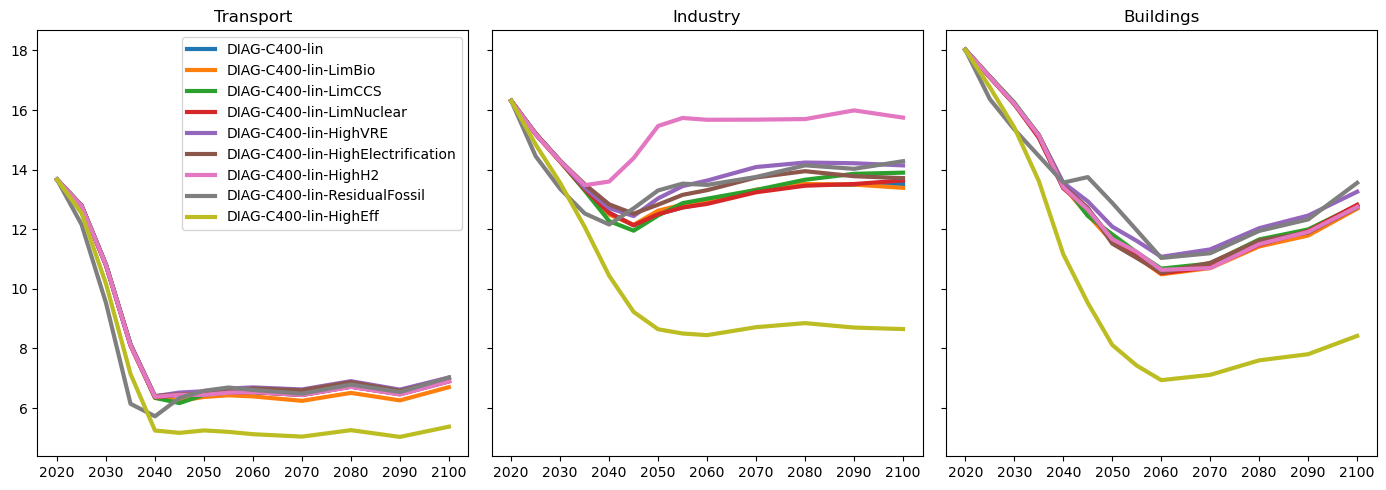

In [14]:
model = 'REMIND 2.1'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
for scen_i, scen in enumerate(calcclass.settings['scenarios_c400']):
    ax1.plot(np.arange(2020, 2101), calcclass.data_xr.sel(Model=model, Scenario=scen, Region='Europe', Variable='Final Energy|Transportation', Time=np.arange(2020, 2101)).Value, label=scen, lw=3)
    ax2.plot(np.arange(2020, 2101), calcclass.data_xr.sel(Model=model, Scenario=scen, Region='Europe', Variable='Final Energy|Industry', Time=np.arange(2020, 2101)).Value, lw=3)
    ax3.plot(np.arange(2020, 2101), calcclass.data_xr.sel(Model=model, Scenario=scen, Region='Europe', Variable='Final Energy|Residential and Commercial', Time=np.arange(2020, 2101)).Value, lw=3)
ax1.legend()
ax1.set_title('Transport')
ax2.set_title("Industry")
ax3.set_title('Buildings')
fig.tight_layout()